In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from causalml.dataset import make_uplift_classification_logistic
from causalml.dataset import make_uplift_classification

Failed to import duecredit due to No module named 'duecredit'


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from pygam import LogisticGAM, s

In [5]:
from causalml.propensity import (
    ElasticNetPropensityModel,
    GradientBoostedPropensityModel,
    LogisticRegressionPropensityModel,
)
from causalml.metrics import roc_auc_score

In [6]:
from causalml.propensity import compute_propensity_score

# Copy code from tests/ to create data

In [7]:
RANDOM_SEED = 42
N_SAMPLE = 1000
ERROR_THRESHOLD = 0.5
NUM_FEATURES = 6

TREATMENT_COL = "treatment"
SCORE_COL = "score"
GROUP_COL = "group"
OUTCOME_COL = "outcome"

CONTROL_NAME = "control"
TREATMENT_NAMES = [CONTROL_NAME, "treatment1", "treatment2", "treatment3"]
CONVERSION = "conversion"
DELTA_UPLIFT_INCREASE_DICT = {
    "treatment1": 0.25,
}
N_UPLIFT_INCREASE_DICT = {"treatment1": 2}


In [8]:
np.random.seed(RANDOM_SEED)

In [9]:
df, x_names = make_uplift_classification(
    n_samples=N_SAMPLE,
    treatment_name=TREATMENT_NAMES,
    y_name=CONVERSION,
    random_seed=RANDOM_SEED,
)


In [10]:
df


,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,...,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
0,control,0.657479,-0.443360,-2.402375,2.195439,-0.918792,0.953660,1.380484,-0.414387,-0.314830,...,-0.589027,0.485289,1.380695,0.862746,-0.139670,-3.339225,-0.670977,-1.060338,1,0
1,treatment3,-3.550170,-0.677176,0.496001,2.578495,0.878774,-1.265629,1.507098,0.472798,0.031004,...,-0.270001,0.622789,1.133862,0.932638,-0.185633,1.421218,0.798990,1.143162,1,0
2,control,0.337708,-0.205064,-0.935860,2.387802,1.291499,0.321825,-0.176657,-0.919809,-0.729275,...,-0.466893,0.549570,0.455023,1.345184,-0.132644,-0.629653,1.056432,-0.102886,1,0
3,treatment3,-0.658448,0.709190,-0.904006,0.916896,-1.774884,0.738277,-0.274451,1.544034,-0.094857,...,-1.706929,0.019702,0.808746,1.112279,0.044175,-0.235096,2.678429,-0.666264,0,0
4,treatment2,-1.746624,0.815740,0.526936,-1.045280,-0.214065,0.057787,-2.294394,0.560460,0.342247,...,-0.814635,-0.368205,0.709317,1.075760,0.065456,0.915348,1.409424,-0.264037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,treatment1,-0.781229,0.643953,-0.156863,1.799299,1.127438,-0.199674,-1.261297,-0.317617,-0.029676,...,-0.592398,0.383991,0.670806,1.237448,0.023751,-0.780821,1.504774,-0.845323,0,0
3996,treatment1,-0.149589,-0.593811,0.382449,0.227025,-0.156404,1.008681,-1.368592,-0.886641,-0.600990,...,-0.869664,-0.051109,0.714499,1.233508,-0.192675,1.620011,3.217546,1.160765,0,0
3997,control,1.025420,1.322352,0.045153,-0.510702,-0.147870,-0.179250,0.800310,-0.831470,-1.018497,...,-0.956098,-0.249793,0.511915,-0.857066,0.293157,0.352540,1.483086,-0.907262,1,0
3998,treatment3,0.624495,1.519888,0.505061,3.550311,-0.196157,-2.047163,0.132495,0.200972,0.804704,...,-1.093604,0.767107,1.180481,0.846085,0.205257,0.717389,1.219995,-0.910540,1,0


In [11]:
x_names

['x1_informative',
 'x2_informative',
 'x3_informative',
 'x4_informative',
 'x5_informative',
 'x6_irrelevant',
 'x7_irrelevant',
 'x8_irrelevant',
 'x9_irrelevant',
 'x10_irrelevant',
 'x11_uplift_increase',
 'x12_uplift_increase',
 'x13_increase_mix',
 'x14_uplift_increase',
 'x15_uplift_increase',
 'x16_increase_mix',
 'x17_uplift_increase',
 'x18_uplift_increase',
 'x19_increase_mix']

In [12]:
df["treatment_group_key"] = np.where(
    df["treatment_group_key"] == CONTROL_NAME, 0, 1
)

In [13]:
df

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,...,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
0,0,0.657479,-0.443360,-2.402375,2.195439,-0.918792,0.953660,1.380484,-0.414387,-0.314830,...,-0.589027,0.485289,1.380695,0.862746,-0.139670,-3.339225,-0.670977,-1.060338,1,0
1,1,-3.550170,-0.677176,0.496001,2.578495,0.878774,-1.265629,1.507098,0.472798,0.031004,...,-0.270001,0.622789,1.133862,0.932638,-0.185633,1.421218,0.798990,1.143162,1,0
2,0,0.337708,-0.205064,-0.935860,2.387802,1.291499,0.321825,-0.176657,-0.919809,-0.729275,...,-0.466893,0.549570,0.455023,1.345184,-0.132644,-0.629653,1.056432,-0.102886,1,0
3,1,-0.658448,0.709190,-0.904006,0.916896,-1.774884,0.738277,-0.274451,1.544034,-0.094857,...,-1.706929,0.019702,0.808746,1.112279,0.044175,-0.235096,2.678429,-0.666264,0,0
4,1,-1.746624,0.815740,0.526936,-1.045280,-0.214065,0.057787,-2.294394,0.560460,0.342247,...,-0.814635,-0.368205,0.709317,1.075760,0.065456,0.915348,1.409424,-0.264037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,-0.781229,0.643953,-0.156863,1.799299,1.127438,-0.199674,-1.261297,-0.317617,-0.029676,...,-0.592398,0.383991,0.670806,1.237448,0.023751,-0.780821,1.504774,-0.845323,0,0
3996,1,-0.149589,-0.593811,0.382449,0.227025,-0.156404,1.008681,-1.368592,-0.886641,-0.600990,...,-0.869664,-0.051109,0.714499,1.233508,-0.192675,1.620011,3.217546,1.160765,0,0
3997,0,1.025420,1.322352,0.045153,-0.510702,-0.147870,-0.179250,0.800310,-0.831470,-1.018497,...,-0.956098,-0.249793,0.511915,-0.857066,0.293157,0.352540,1.483086,-0.907262,1,0
3998,1,0.624495,1.519888,0.505061,3.550311,-0.196157,-2.047163,0.132495,0.200972,0.804704,...,-1.093604,0.767107,1.180481,0.846085,0.205257,0.717389,1.219995,-0.910540,1,0


#  Fit propensity score models

## Logistic Regression (sci-kit learn)

In [14]:
pm_lr = LogisticRegression()

In [15]:
pm_lr.fit(X=df[x_names].values, y=df["treatment_group_key"].values)

LogisticRegression()

In [16]:
ps_lr = pm_lr.predict_proba(df[x_names].values)[:, 1]

array([[<Axes: title={'center': '0'}>]], dtype=object)

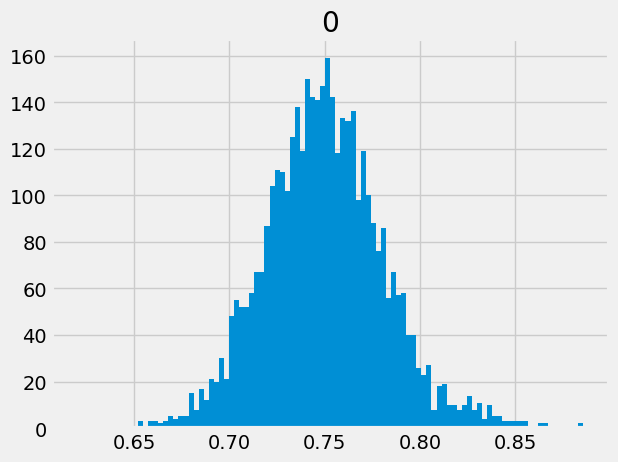

In [17]:
pd.DataFrame(ps_lr).hist(bins=100)

## Logistic Regression (CausalML)

In [18]:
pm_lrcml = LogisticRegressionPropensityModel(random_state=RANDOM_SEED)
ps_lrcml = pm_lrcml.fit_predict(df[x_names].values, df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

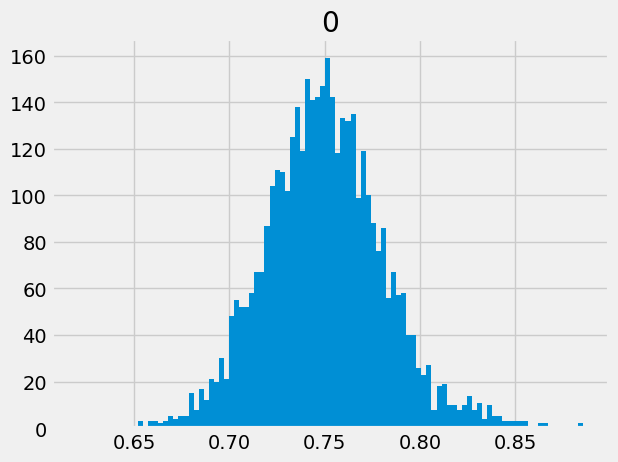

In [19]:
pd.DataFrame(ps_lrcml).hist(bins=100)

## Elastic Net (CausalML)

In [20]:
pm_en = ElasticNetPropensityModel(random_state=RANDOM_SEED)
ps_en = pm_en.fit_predict(df[x_names].values, df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

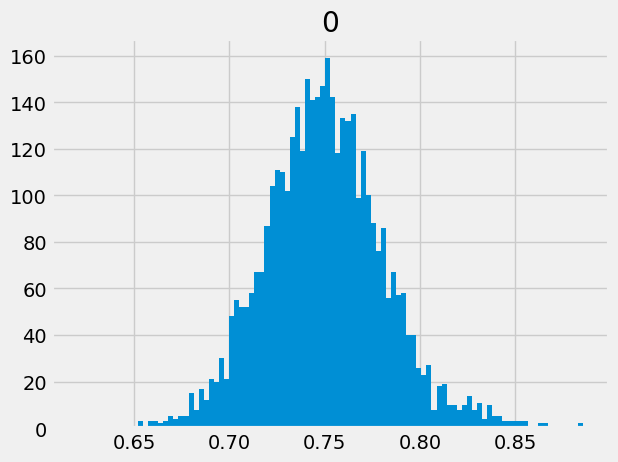

In [21]:
pd.DataFrame(ps_en).hist(bins=100) 

## Gradient Boosted Propensity Model

In [22]:
pm_gbm = GradientBoostedPropensityModel(random_state=RANDOM_SEED)
ps_gbm = pm_gbm.fit_predict(df[x_names].values, df["treatment_group_key"].values)


array([[<Axes: title={'center': '0'}>]], dtype=object)

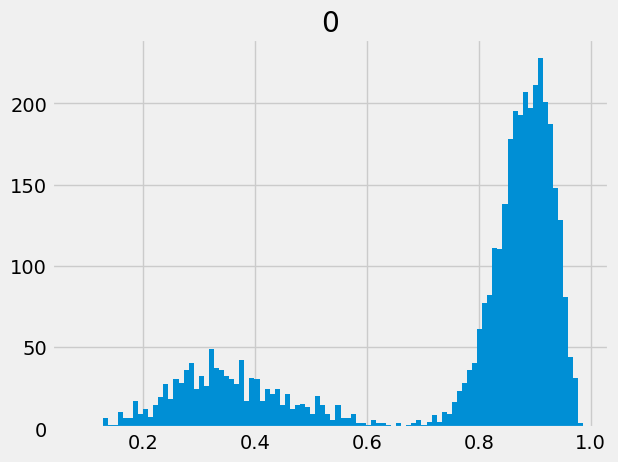

In [23]:
pd.DataFrame(ps_gbm).hist(bins=100)

Gradient Boosted model above is the only one that has a non-normal histogram of propensity scores: a test-case for calibration.

# Looking at `compute_propensity_score`

##  Calculate the uncalibrated propensity scores 

In [24]:
ps_cps_uc, psm_cps = compute_propensity_score(df[x_names].values, df["treatment_group_key"].values, calibrate_p=False)

array([[<Axes: title={'center': '0'}>]], dtype=object)

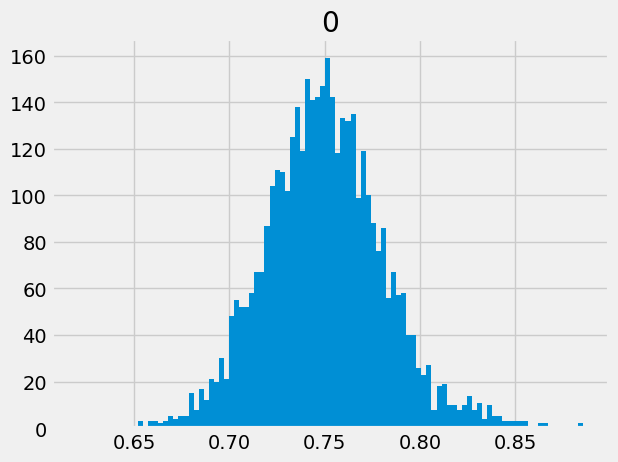

In [25]:
pd.DataFrame(ps_cps_uc).hist(bins=100)

Uncalibrated propensity score histogram (ElasticNet) is similar/equal to LogisticRegression propensity score 

# Compute the calibrated propensity scores using `compute_propensity_score`

In [26]:
ps_cps_c, psm_cps = compute_propensity_score(df[x_names].values, df["treatment_group_key"].values, calibrate_p=True)

array([[<Axes: title={'center': '0'}>]], dtype=object)

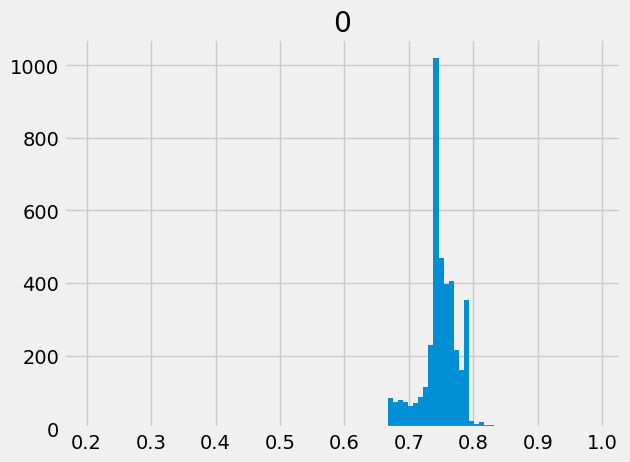

In [27]:
pd.DataFrame(ps_cps_c).hist(bins=100)

This looks a bit odd: skewed and cut-off.

In [28]:
## Create calibration diagram?

# Looking at `calibrate` function

## Copy the `calibrate` function and keep LogisticGAM

In [29]:
def calibrate_pg(ps, treatment):
    """Calibrate propensity scores with logistic GAM.

    Ref: https://pygam.readthedocs.io/en/latest/api/logisticgam.html

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """

    gam = LogisticGAM(s(0)).fit(ps, treatment)

    return gam.predict_proba(ps)

### Calibrate the Logistic Regression model scores

In [30]:
ps_cal_lr_pg = calibrate_pg(ps_lr, df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

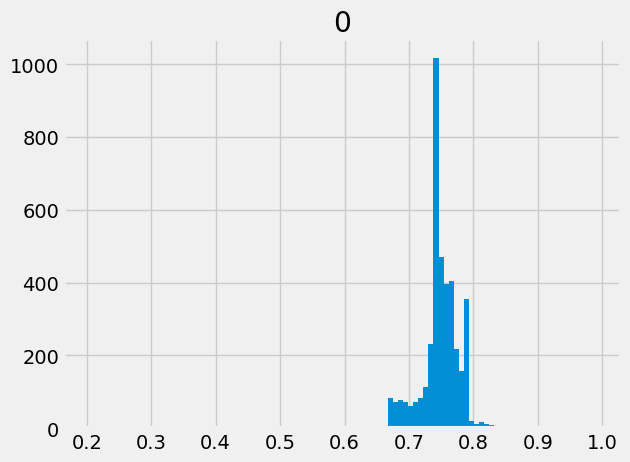

In [31]:
pd.DataFrame(ps_cal_lr_pg).hist(bins=100)

From the above, we see that running `calibrate_pg()` on the logistic regression scores produces a calibrated propensity score histogram that matches the histogram from `compute_propensity_score(..., calibrate_p=True)` above.

### Calibrate the Gradient Boosted Propensity model scores

array([[<Axes: title={'center': '0'}>]], dtype=object)

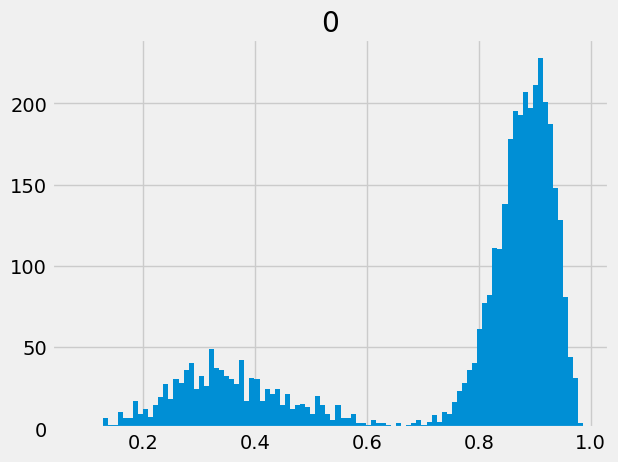

In [36]:
pd.DataFrame(ps_gbm).hist(bins=100)

In [37]:
ps_cal_gbm_pg = calibrate_pg(ps_gbm, df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

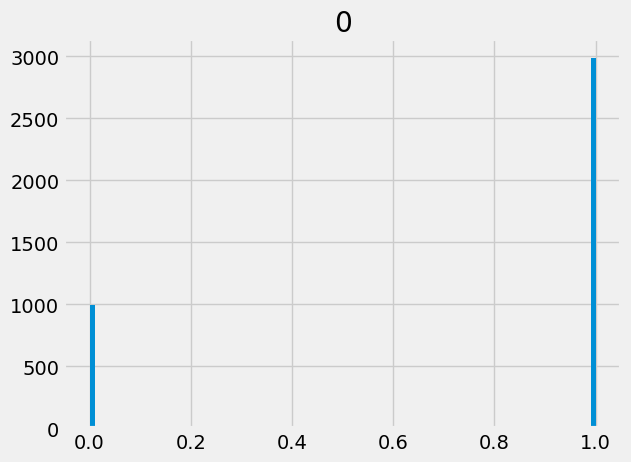

In [38]:
pd.DataFrame(ps_cal_gbm_pg).hist(bins=100)

From the above, we see that running `calibrate_pg()` on the gradient boosted model scores produces a calibrated propensity score histogram that is essentially binomial.

# Modify the Calibration function to use LogisticRegression

In [41]:
def calibrate_lr(ps, treatment):
    """Calibrate propensity scores with LogisticRegression.

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """

    lrm = LogisticRegression().fit(ps, treatment)

    return lrm.predict_proba(ps)

## Calibrate the Logistic Regression scores with `calibrate_lr`

array([[<Axes: title={'center': '0'}>]], dtype=object)

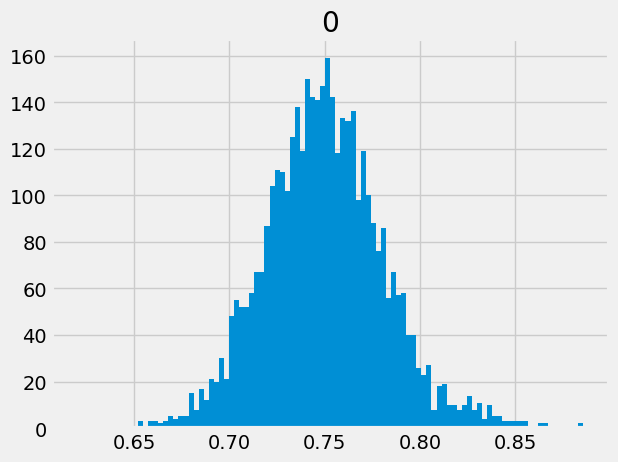

In [44]:
pd.DataFrame(ps_lr).hist(bins=100)

In [46]:
ps_cal_lr_lr = calibrate_lr(ps_lr.reshape(-1,1), df["treatment_group_key"].values)[:, 1]

array([[<Axes: title={'center': '0'}>]], dtype=object)

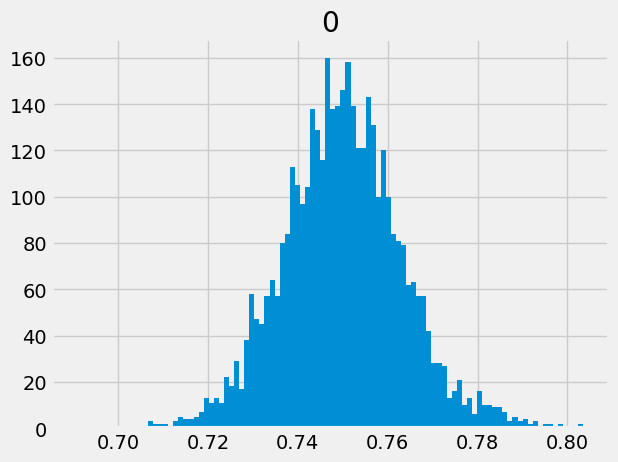

In [48]:
pd.DataFrame(ps_cal_lr_lr).hist(bins=100)

## Calibrate the GMB scores with `calibrate_lr`

array([[<Axes: title={'center': '0'}>]], dtype=object)

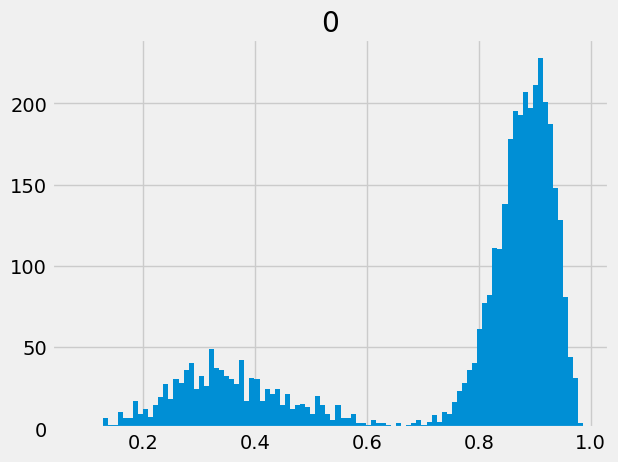

In [49]:
pd.DataFrame(ps_gbm).hist(bins=100)

In [51]:
ps_cal_gbm_lr = calibrate_lr(ps_gbm.reshape(-1,1), df["treatment_group_key"].values)[:, 1]

array([[<Axes: title={'center': '0'}>]], dtype=object)

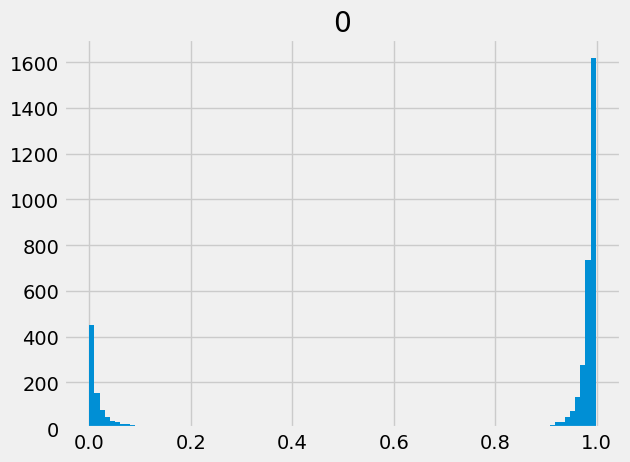

In [52]:
pd.DataFrame(ps_cal_gbm_lr).hist(bins=100)

# Log Loss

In [54]:
from sklearn.metrics import log_loss

In [56]:
# ps_cal_pg = calibrate_pg(df["propensity_score"].values, df["treatment_group_key"].values)

log_loss(df["treatment_group_key"].values, ps_lr)


0.5596360892011015

In [59]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_lr)


0.029830063769922963

In [59]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_lr)


0.029830063769922963

In [62]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_pg)


0.0016574101535184985

# Modify the Calibration function to use GBM

In [66]:
def calibrate_gbm(ps, treatment):
    """Calibrate propensity scores with GBM.

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """
    pm_gbm = GradientBoostedPropensityModel(random_state=RANDOM_SEED)
    ps_gbm = pm_gbm.fit_predict(ps, treatment)

    return ps_gbm

## Calibrate the Logistic Regression scores with `calibrate_gbm`

array([[<Axes: title={'center': '0'}>]], dtype=object)

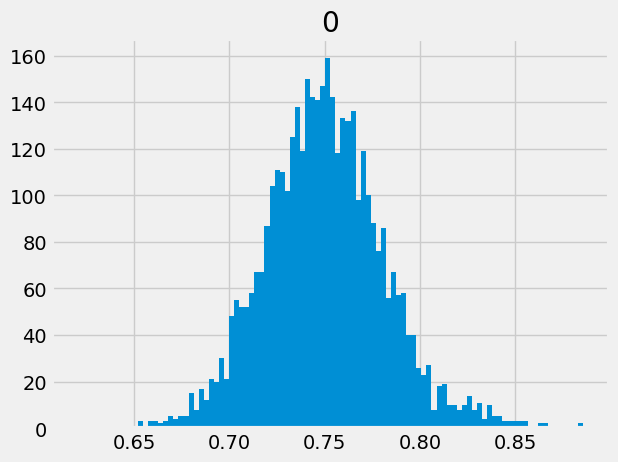

In [72]:
pd.DataFrame(ps_lr).hist(bins=100)

In [73]:
ps_lr

array([0.71887504, 0.74028955, 0.73688147, ..., 0.80023764, 0.80116772,
       0.76505901])

In [74]:
ps_cal_lr_gbm = calibrate_gbm(ps_lr.reshape(-1,1), df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

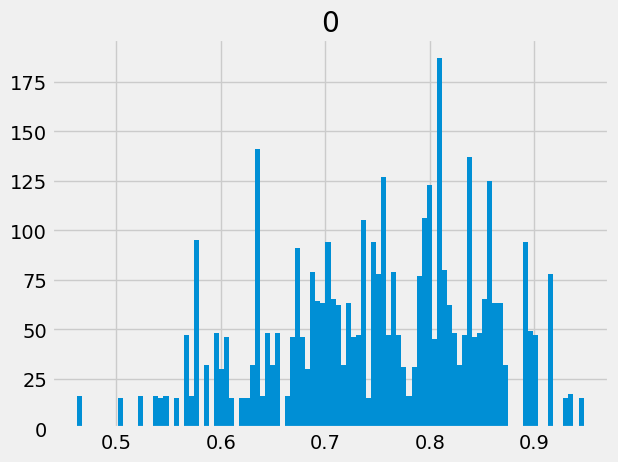

In [75]:
pd.DataFrame(ps_cal_lr_gbm).hist(bins=100)

## Calibrate the GMB scores with `calibrate_gbm`

array([[<Axes: title={'center': '0'}>]], dtype=object)

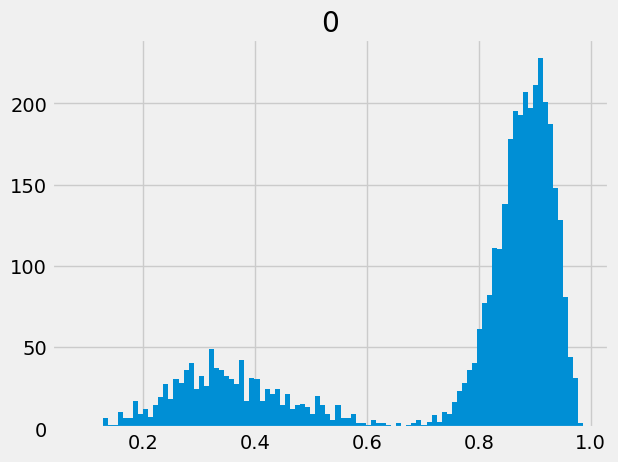

In [76]:
pd.DataFrame(ps_gbm).hist(bins=100)

In [77]:
ps_cal_gbm_gbm = calibrate_gbm(ps_gbm.reshape(-1,1), df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

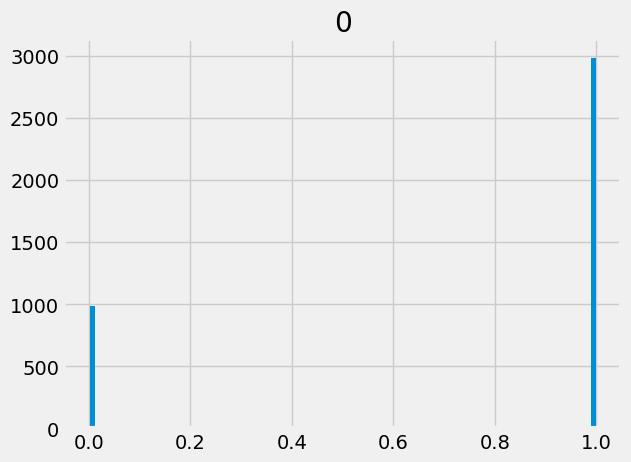

In [78]:
pd.DataFrame(ps_cal_gbm_gbm).hist(bins=100)

# Log Loss

In [79]:
from sklearn.metrics import log_loss

## Compare log loss on logreg scores

In [98]:
log_loss(df["treatment_group_key"].values, ps_lr)

0.5596360892011015

In [99]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_pg)


0.5589966487977526

In [100]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_lr)


0.5605614027408914

In [101]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_gbm)


0.5268518310714831

## Compare log loss on gbm scores

In [103]:
log_loss(df["treatment_group_key"].values, ps_gbm)

0.21128888734327234

In [104]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_pg)


0.0016574101535184985

In [105]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_lr)


0.029830063769922963

In [106]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_gbm)


0.0029015217704915094

# Modify the Calibration function to use Isotonic Regression

In [107]:
from sklearn.isotonic import IsotonicRegression

In [112]:
def calibrate_iso(ps, treatment):
    """Calibrate propensity scores with IsotonicRegression.

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """
    pm_ir = IsotonicRegression(out_of_bounds="clip")
    ps_ir = pm_ir.fit_transform(ps, treatment)
    #ps_ir = pm_ir.predict(ps)

    return ps_ir

## Calibrate the Logistic Regression scores with `calibrate_iso`

array([[<Axes: title={'center': '0'}>]], dtype=object)

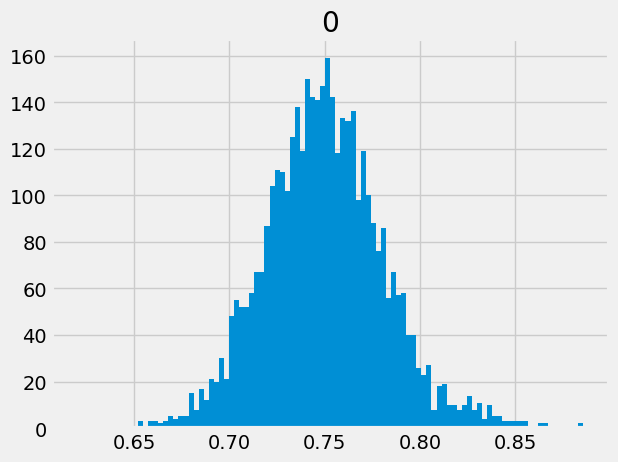

In [113]:
pd.DataFrame(ps_lr).hist(bins=100)

In [114]:
ps_cal_lr_iso = calibrate_iso(ps_lr.reshape(-1,1), df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

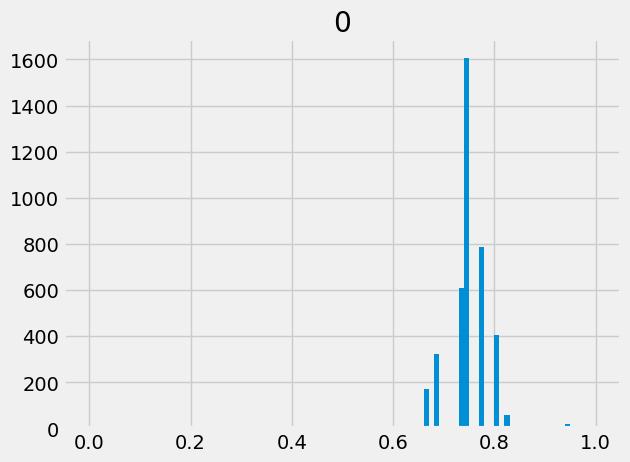

In [115]:
pd.DataFrame(ps_cal_lr_iso).hist(bins=100)

## Calibrate the GMB scores with `calibrate_iso`

array([[<Axes: title={'center': '0'}>]], dtype=object)

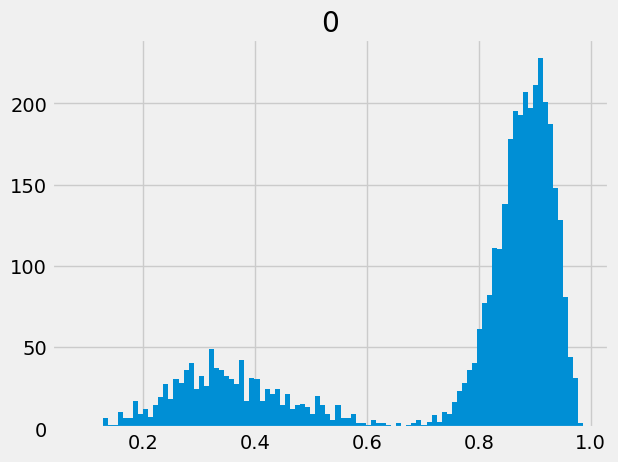

In [116]:
pd.DataFrame(ps_gbm).hist(bins=100)

In [117]:
ps_cal_gbm_iso = calibrate_iso(ps_gbm.reshape(-1,1), df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

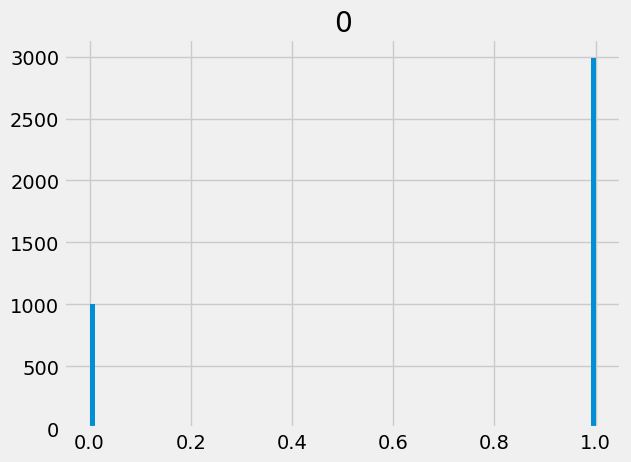

In [118]:
pd.DataFrame(ps_cal_gbm_iso).hist(bins=100)

## Compare loss metrics on logreg scores

In [133]:
from sklearn.metrics import brier_score_loss

In [137]:
log_loss(df["treatment_group_key"].values, ps_lr)

0.5596360892011015

In [136]:
brier_score_loss(df["treatment_group_key"].values, ps_lr)

0.1865121616680246

In [128]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_pg)


0.5589966487977526

In [138]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_lr_pg)

0.18630534324551137

In [129]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_lr)


0.5605614027408914

In [139]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_lr_lr)

0.18683847239810675

In [130]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_gbm)


0.5268518310714831

In [140]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_lr_gbm)

0.1746449903454354

In [131]:
log_loss(df["treatment_group_key"].values, ps_cal_lr_iso)


0.557280662413523

In [141]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_lr_iso)

0.18575981989277546

## Compare log loss on gbm scores

In [142]:
log_loss(df["treatment_group_key"].values, ps_gbm)

0.21128888734327234

In [143]:
brier_score_loss(df["treatment_group_key"].values, ps_gbm)

0.04755848801420284

In [122]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_pg)


0.0016574101535184985

In [144]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_gbm_pg)

0.0003984392619240189

In [145]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_lr)


0.029830063769922963

In [146]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_gbm_lr)

0.0041276109719922795

In [124]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_gbm)


0.0029015217704915094

In [147]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_gbm_gbm)

0.0004732778315971428

In [125]:
log_loss(df["treatment_group_key"].values, ps_cal_gbm_iso)


0.0008378681491815074

In [148]:
brier_score_loss(df["treatment_group_key"].values, ps_cal_gbm_iso)

0.00022727272727272928

# Scratch